After the preliminary analysis and ensemble training, now we postprocess the results.

# Load the results

In [2]:
from pathlib import Path
from kim.map import KIM
from kim.data import Data

# Load the preliminary analysis result
f_data = Path('./data')
data = Data(fdata=f_data)
# data.load(f_data, check_xy=False)

# Load the ensemble learning result
f_kim = Path('./kim')
kim = KIM(data, map_configs={}, mask_option="cond_sensitivity", map_option='many2one')
kim.load(f_kim)


In [ ]:
# X and Y labels
y_labels = ['y1', 'y2', 'y3']
x_labels = ['x1', 'x2', 'x3', 'x4']


# Calculate the training performances on the given dataset

In [3]:
results = kim.evaluate_maps_on_givendata()

# Plot the preliminary analysis results

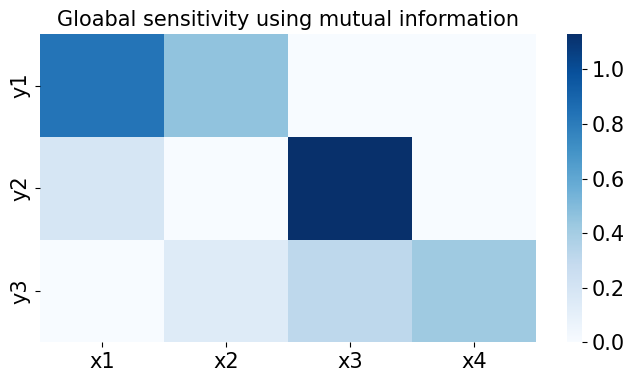

In [10]:
from kim.utils import plot_sensitivity
import matplotlib.pyplot as plt
# Global sensitivity analysis
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_sensitivity(data.sensitivity.T)
ax.set(
    title='Gloabal sensitivity using mutual information',
    xticklabels=x_labels, yticklabels=y_labels
);


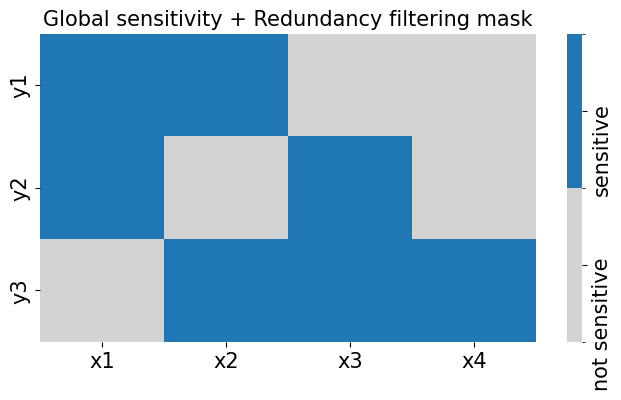

In [11]:
from kim.utils import plot_sensitivity_mask
# Global sensitivity + redundancy filtering check
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_sensitivity_mask(data.cond_sensitivity_mask.T)
ax.set(
    title='Global sensitivity + Redundancy filtering mask',
    xticklabels=x_labels, yticklabels=y_labels
);

# Plot the training results

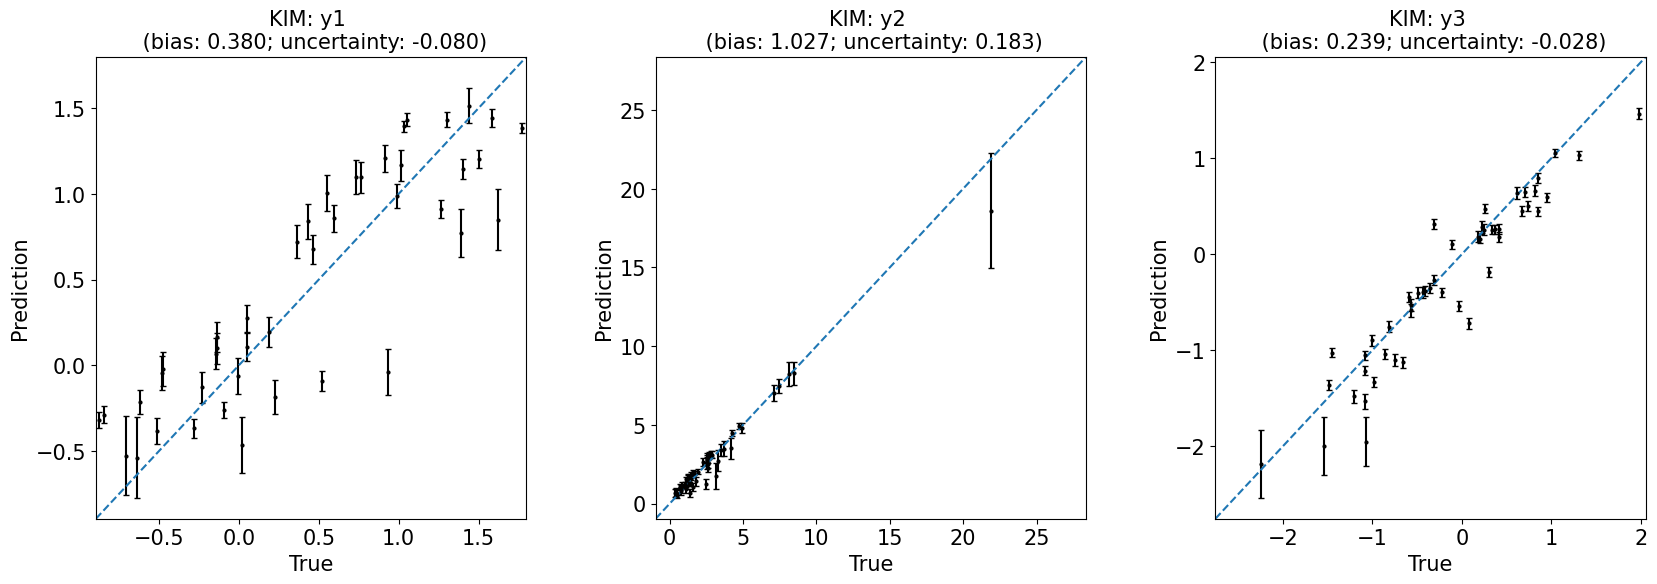

In [12]:
from kim.utils import plot_1to1_uncertainty
train_or_test = 'test'
fig, axes = plt.subplots(1,data.Ny,figsize=(20,6))
for i in range(data.Ny):
    ax = axes[i]
    plot_1to1_uncertainty(results, iy=i, ax=ax, train_or_test=train_or_test, model='KIM', y_var=y_labels[i])

plt.subplots_adjust(hspace=0.2, wspace=0.3)
